In [1]:
import konlpy
from konlpy.tag import Okt 
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [2]:
# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
# 시각화 옵션 
from IPython.display import set_matplotlib_formats

mpl.rc('font',family='Malgun Gothic') # 시각화 한글 글꼴 설정
mpl.rc('axes',unicode_minus = True)   # 음수값 글꼴 설정 

set_matplotlib_formats('retina') # 글씨체 선명하게 

In [3]:
kkma    = Kkma()
okt     = Okt()
komoran = Komoran()
hannanum= Hannanum()

In [4]:
df1 = pd.read_csv('./BERT_BMC/data/가치제안.csv')
print(df1.shape)
df1.head()

(504, 2)


,가치제안,label
0,창의적인 디자인을 통한 풍요로운 도시공간의 가치창출\n건축문화를 선도하는 리더그룹으...,B
1,기술혁신과 환경 부담 개선을 통하여 전자산업 발전에 공헌하고 환경 보전에 힘쓴다. ...,A
2,"품질, 기술, 완벽한 시공으로 고객만족을 실현\n하자율 최소화(제로)로 입주자 고객...",E
3,"전문성을 바탕으로 한 신뢰를 구축을 통한 용역서비스 ( 석면조사, 작업환경측정업,...",A
4,"고객이 만족하는 제품을 생산하여 공급\n신뢰를 바탕으로 고객, 협력사, 제휴기업과의...",D


In [5]:
comm_list = df1['가치제안'].values.tolist()

In [6]:
comm_list[0]

'창의적인 디자인을 통한 풍요로운 도시공간의 가치창출\n건축문화를 선도하는 리더그룹으로서의 사회적 책임완수\n독창적 디자인과 차원 높은 문제해결의 통합디자인 솔루션 제공'

In [7]:
okt.pos(comm_list[0])

[('창의', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('디자인', 'Noun'),
 ('을', 'Josa'),
 ('통한', 'Noun'),
 ('풍요', 'Noun'),
 ('로운', 'Josa'),
 ('도시', 'Noun'),
 ('공간', 'Noun'),
 ('의', 'Josa'),
 ('가치', 'Noun'),
 ('창', 'Noun'),
 ('출', 'Verb'),
 ('\n', 'Foreign'),
 ('건축', 'Noun'),
 ('문화', 'Noun'),
 ('를', 'Josa'),
 ('선도', 'Noun'),
 ('하는', 'Verb'),
 ('리더', 'Noun'),
 ('그룹', 'Noun'),
 ('으로서의', 'Josa'),
 ('사회', 'Noun'),
 ('적', 'Suffix'),
 ('책임', 'Noun'),
 ('완수', 'Noun'),
 ('\n', 'Foreign'),
 ('독창', 'Noun'),
 ('적', 'Suffix'),
 ('디자인', 'Noun'),
 ('과', 'Josa'),
 ('차원', 'Noun'),
 ('높은', 'Adjective'),
 ('문제해결', 'Noun'),
 ('의', 'Josa'),
 ('통합', 'Noun'),
 ('디자인', 'Noun'),
 ('솔루션', 'Noun'),
 ('제공', 'Noun')]

In [8]:
pos_data = pd.DataFrame(okt.pos(comm_list[0]) , columns=['형태소','품사'])
pos_data.head()

,형태소,품사
0,창의,Noun
1,적,Suffix
2,인,Josa
3,디자인,Noun
4,을,Josa


In [9]:
df_Pos = pd.DataFrame()

for i in range(0,len(df1['가치제안'])):
    pos_data = okt.pos(df1['가치제안'].values.tolist()[i])
    dfn = pd.DataFrame(pos_data)
    
    df_Pos = pd.concat([df_Pos, dfn])

In [10]:
pos_data = df_Pos.rename(columns={0:'형태소',1:'품사'})
pos_data.head()

,형태소,품사
0,창의,Noun
1,적,Suffix
2,인,Josa
3,디자인,Noun
4,을,Josa


In [11]:
pos_data.shape

(21214, 2)

In [12]:
pos_data['품사'].value_counts()
# Josa, Punctuation, Adverb, Number

Noun           11392
Josa            3958
Punctuation     1293
Verb            1218
Adjective        913
Foreign          854
Suffix           587
Alpha            452
Modifier         340
Number            95
Adverb            80
Determiner        18
VerbPrefix         7
Conjunction        5
Exclamation        2
Name: 품사, dtype: int64

In [43]:
cond1   = (pos_data['품사']=='Noun')
df_Noun = pos_data.loc[cond1]
df_Noun.head(30)

,형태소,품사
0,창의,Noun
3,디자인,Noun
5,통한,Noun
6,풍요,Noun
8,도시,Noun
9,공간,Noun
11,가치,Noun
12,창,Noun
15,건축,Noun
16,문화,Noun


In [14]:
from wordcloud import WordCloud

In [52]:
stopwords_kr = []
newStopWords = ['및','통한', '등', '대한', '함','통해','위','수','것']
stopwords_kr.extend(newStopWords)
stopwords_kr

['및', '통한', '등', '대한', '함', '통해', '위', '수', '것']

In [53]:
wc = WordCloud(stopwords = stopwords_kr,width=800,height=600,
               font_path='HanaUL.ttf').generate(' '.join(df_Noun['형태소']))

In [54]:
# wc = WordCloud(width=800,height=600,
#                font_path='HanaUL.ttf').generate(' '.join(df_Noun['형태소']))

# Noun

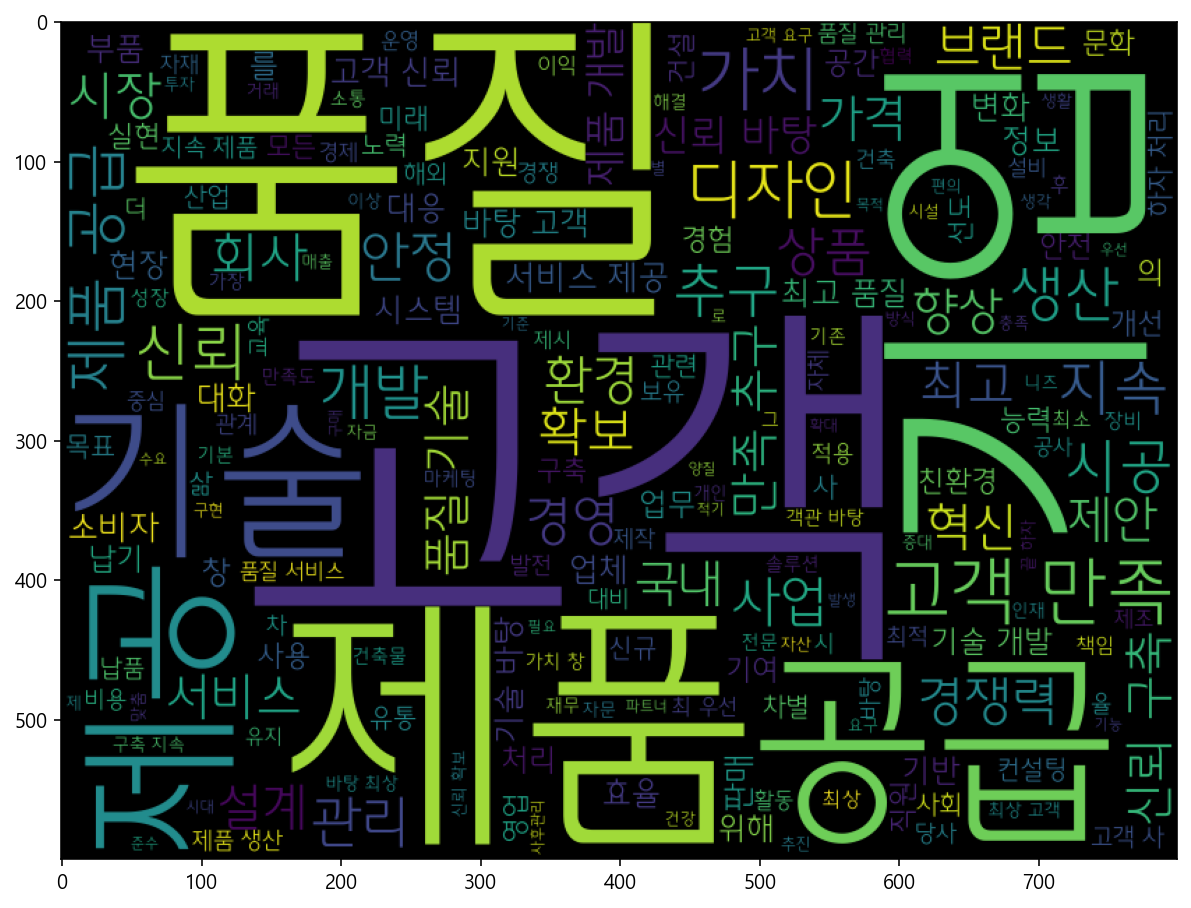

In [55]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

# Verb

In [42]:
cond2   = (pos_data['품사']=='Verb')
df_verb = pos_data.loc[cond2]
df_verb.head(20)

,형태소,품사
13,출,Verb
19,하는,Verb
8,하여,Verb
18,힘쓴다,Verb
39,한다,Verb
60,할,Verb
66,하여,Verb
70,힘쓴다,Verb
4,한,Verb
36,시키기,Verb


In [ ]:
stopwords_kr = []
newStopWords = ['및','통한', '등', '대한', '함']
stopwords_kr.extend(newStopWords)
stopwords_kr

In [ ]:
wc = WordCloud(stopwords = stopwords_kr,width=800,height=600,
               font_path='HanaUL.ttf').generate(' '.join(df_Noun['형태소']))

In [18]:
# wc = WordCloud(width=800,height=600,
#                font_path='HanaUL.ttf').generate(' '.join(df_verb['형태소']))

- 명사만 하면 될듯

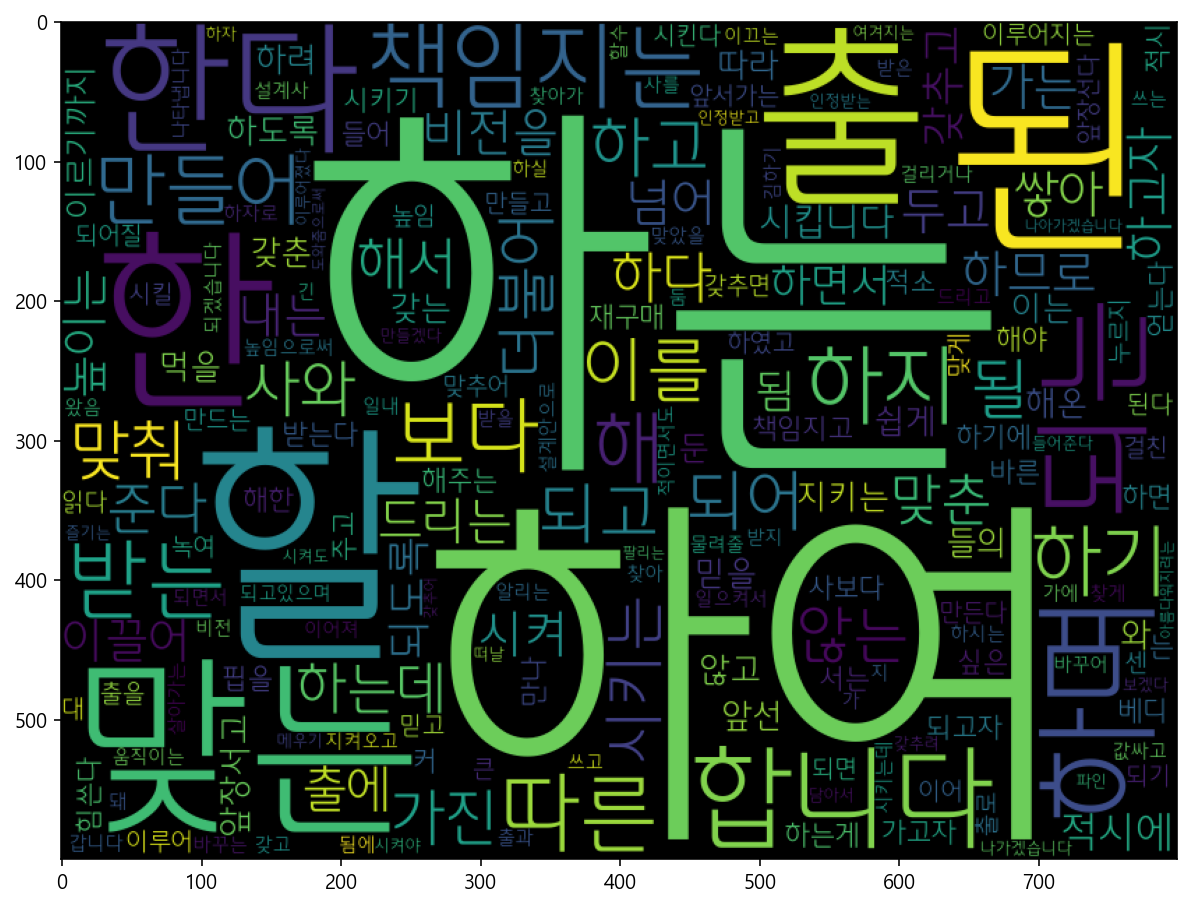

In [19]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

# 네트워크 분석

In [20]:
import networkx as nx 
from  apyori import apriori

from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
# 시각화 옵션
from IPython.display import set_matplotlib_formats
# 한글 글꼴 설정
mpl.rc('font',family ='Malgun Gothic')
# 음수값 설정 
mpl.rc('axes',unicode_minus= True )
# 그래프 선명하게 출력
set_matplotlib_formats('retina')

In [21]:
from konlpy.tag import Okt
import re 

In [22]:
# ll = ['Josa','Adverb','Number','Punctuation']
# cond3 = (pos_data['품사']==ll)
# pos_data['품사']
# df_ex = pos_data.loc[cond3]
# df_ex.head()

In [39]:
#Josa / Punctuation / Adverb / Number
cond1   = (pos_data['품사'] == 'Josa')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("./bul/df2.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Punctuation')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("./bul/df3.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Adverb')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("./bul/df4.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Number')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("./bul/df5.csv", mode='w', encoding='utf-8-sig')

In [46]:
# asdf = pd.DataFrame(Text_data)
# asdf

In [47]:
# Text_data

In [23]:
df_stopword  = pd.read_csv('stopword.txt',header=None, names=['불용어'])
stopword_set = set(df_stopword['불용어'].values.tolist())

In [24]:
# 불용어 및 특수 기호 처리함수 구성 
def stopword_function(X): # Series 형태로 Input 
    clean_train_review = []
    okt = Okt()
    # 모든 X 값에 대해 불용어 및 특수기호 처리 
    for i in X:

        # 문자데이터에 대한 불용어 처리 
        if type(i) == str:
            # 특수 문자 처리 
            review_text = re.sub("[!1(+.),.@@\/n2345']?","",i) 
            # Tokenizing & Stemming 
            word_text = okt.morphs(review_text,stem=True)
            # StopWord 
            word_text = [token for token in word_text if not token in stopword_set]  

            clean_train_review.append(word_text)

        # 숫자데이터가 오는 경우, 공백을 append     
        else:
            clean_train_review.append([])
            
    return clean_train_review

In [25]:
Text_data = stopword_function(df1['가치제안'])

In [26]:
model_TFIDF = TfidfVectorizer()
model_TFIDF.fit_transform(df1['가치제안'])

<504x5131 sparse matrix of type '<class 'numpy.float64'>'
	with 10358 stored elements in Compressed Sparse Row format>

In [27]:
# 유사도 계산하기 위한 벡터 
idf_value = model_TFIDF.idf_

In [28]:
pd.DataFrame({'단어':model_TFIDF.get_feature_names(), '단어벡터':idf_value})

,단어,단어벡터
0,000여군데,6.531411
1,10,6.531411
2,100,5.838264
3,100년,6.531411
4,100년간,6.531411
...,...,...
5126,흡방습,6.531411
5127,흡착,6.531411
5128,희망,6.125946
5129,힐링,6.531411


In [29]:
result = list(apriori(Text_data, min_support =0.02))

In [30]:
df_support = pd.DataFrame(result)

In [31]:
# items 내 단어 수 
df_support['word_count'] = df_support['items'].apply(lambda x : len(x))

In [32]:
cond1     = (df_support['word_count']==2)
df_result = df_support.loc[cond1]

In [33]:
df_result

,items,support,ordered_statistics,word_count
208,"(-, \n)",0.039683,"[((), (\n, -), 0.03968253968253968, 1.0), ((\n...",2
209,"(\n, :)",0.037698,"[((), (\n, :), 0.037698412698412696, 1.0), ((\...",2
210,"(\n, AS)",0.071429,"[((), (\n, AS), 0.07142857142857142, 1.0), ((\...",2
211,"(가격, \n)",0.059524,"[((), (가격, \n), 0.05952380952380952, 1.0), ((\...",2
212,"(\n, 가능하다)",0.065476,"[((), (\n, 가능하다), 0.06547619047619048, 1.0), (...",2
...,...,...,...,...
935,"(품질, 회사)",0.025794,"[((), (품질, 회사), 0.025793650793650792, 1.0), ((...",2
936,"(한, 하고)",0.025794,"[((), (한, 하고), 0.025793650793650792, 1.0), ((하...",2
937,"(함, 하고)",0.029762,"[((), (함, 하고), 0.02976190476190476, 1.0), ((하고...",2
938,"(화, 하고)",0.021825,"[((), (하고, 화), 0.021825396825396824, 1.0), ((하...",2


In [34]:
graph_model = nx.Graph()
p_rank      = nx.pagerank(graph_model)
graph_model.add_edges_from(df_result['items'])

In [35]:
p_graph_shape = nx.kamada_kawai_layout(graph_model)

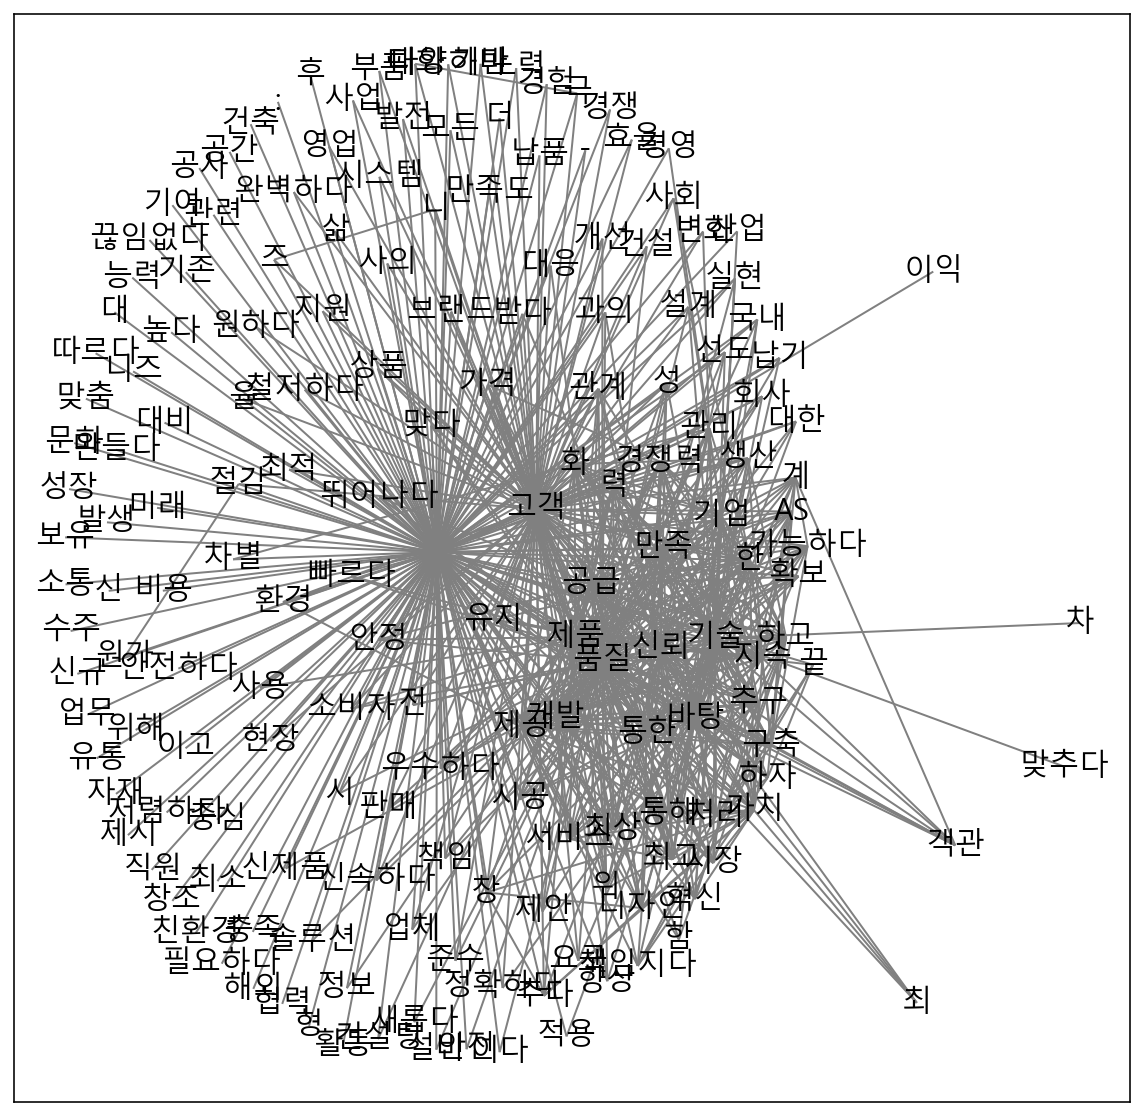

In [36]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))

In [37]:
p_graph_shape = nx.shell_layout(graph_model)

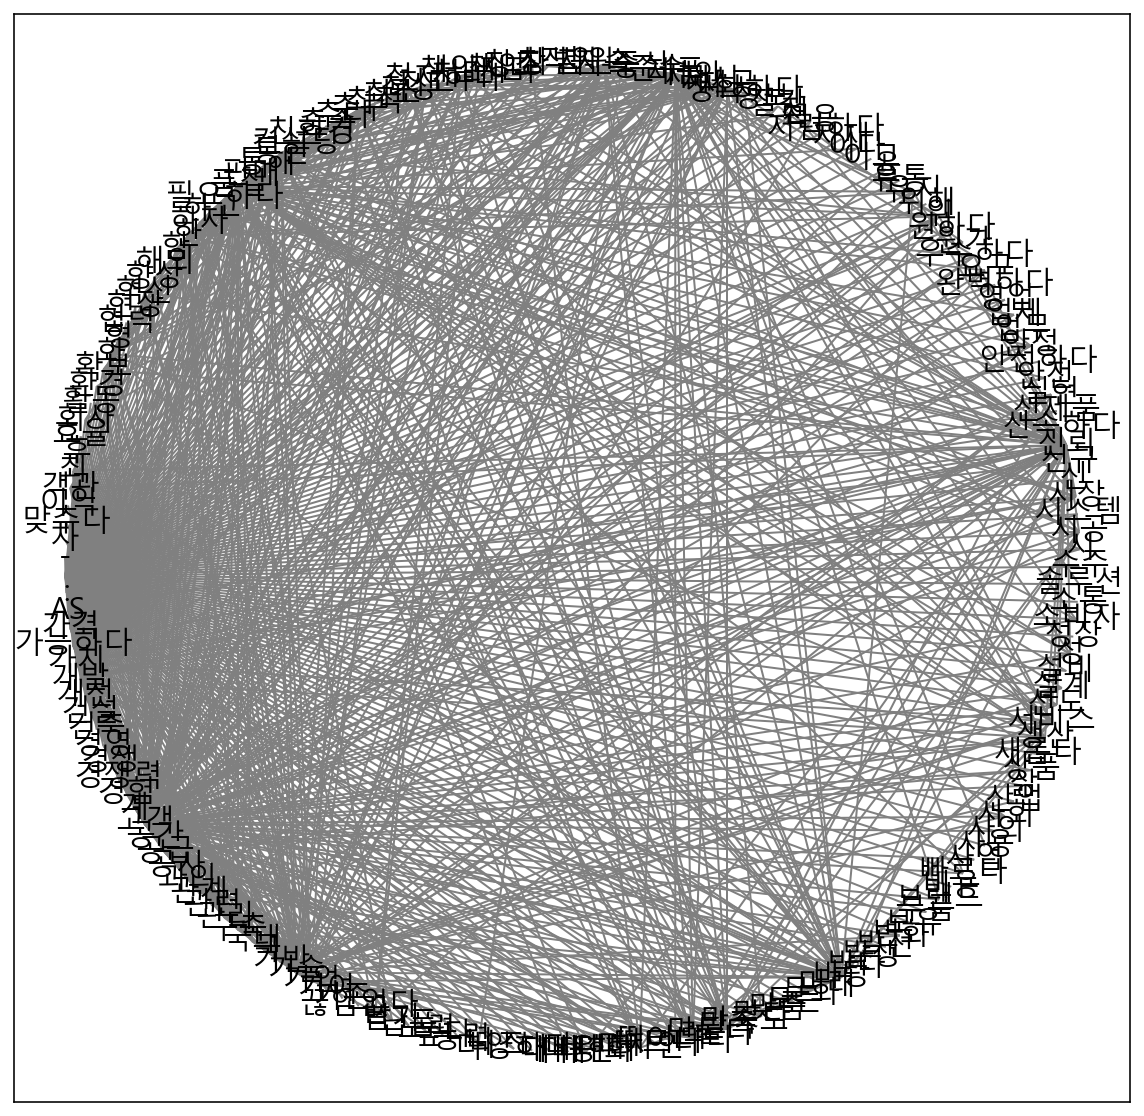

In [38]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))